**Brian Blaylock**  
**February 6, 2019**

# Read HRRR-GLM Lightning Hit Rates and False Alarm Ratios

- **How do distributions different for other regions? (western USA?)**
- Is Reflectivity a better predictor (probably not, since lightning is generally the area of strongest reflectivity. The only thing this would do is expand the radius of convective areas.
- Who does the Hit Rate and False Alarm ratio differ by season, hour, region, forecast lead time etc.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
from matplotlib.path import Path

import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.15
mpl.rcParams['figure.subplot.hspace'] = 0.15
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR_GOES/GLM_hit_rate/'
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, get_hrrr_variable
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST

# Domain Areas
Area of each domain in square kilometers

In [3]:
Hlat, Hlon = get_hrrr_latlon(DICT=False)

PATH_points = {
    'HRRR':
        {'lon': np.concatenate([Hlon[0], Hlon[:,-1], Hlon[-1][::-1], Hlon[:,0][::-1]]),
         'lat': np.concatenate([Hlat[0], Hlat[:,-1], Hlat[-1][::-1], Hlat[:,0][::-1]])},
    'West':{
        'lon':[-120, -104, -104, -120, -120],
        'lat':[24.4, 24.4, 50.2, 50.2, 24.2]},
    'Central':{
        'lon':[-104, -88, -88, -104, -104],
        'lat':[24.4, 24.4, 50.2, 50.2, 24.2]},
    'East':{
        'lon':[-88, -72, -72, -88, -88],
        'lat':[24.4, 24.4, 50.2, 50.2, 24.2]},
    'Utah':{
        'lon':[-114.041664, -111.047526, -111.045645,  -109.051460, -109.048632, -114.051534, -114.041664],
        'lat':[41.993580, 42.002846, 40.998538, 40.998403, 36.998310, 37.000574, 41.993580]}
}

## Combine lat/lon as vertice pair as a tuple. i.e. (lon, lat).
PATH_verts = {}
for i in PATH_points.keys():
    PATH_verts[i] = np.array([(PATH_points[i]['lon'][j], PATH_points[i]['lat'][j]) for j in range(len(PATH_points[i]['lon']))])

## Generate Path objects from the vertices.
PATHS = {}
for i in PATH_verts.keys():
    PATHS[i] = Path(PATH_verts[i])

area_sqkm = {'HRRR':16811840.28,
             'West':4034896.81,
             'Central':4034896.81,
             'East':4034896.81,
             'Utah':219973.26}

# Hit Rate: All hours in a month

In [164]:
def get_data_by_hour(HOUR, MONTHS=range(5,11)):
    """
    Return a dictionary of all the data for the specified Hour from each month.
    
    Input:
        HOUR   - The hour of day, 0-23.
        MONTHS - Default is May-Oct, becuase that is what is avaialble right now.
    """
    # Load the data in a dictionary. Each key is a domain, which is a dicitonary of the data for each month.
    data_dict = {}
    for d in PATHS.keys():
        data_dict[d] = {}
        for m in MONTHS:
            DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/HRRR_GLM_hit_rate_data/'
            FILE = 'GLM_in_HRRR_%s_2018_m%02d_h%02d.csv' % (d, m, HOUR)
            if os.path.exists(DIR+FILE):
                data_dict[d][m] = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')        
            else:
                print('THAT FILE DOES NOT EXIST')

    return data_dict

In [358]:
HOUR = 0


all_data = get_data_by_hour(HOUR)
print(all_data['HRRR'].keys(),'\n')
print(all_data['HRRR'][7].dtype.names)

dict_keys([5, 6, 7, 8, 9, 10]) 

('DATE', 'GLM_FLASH_COUNT', 'NUM_FILES', 'EXPECTED_FILES', 'F00_Hit_Rate', 'F01_Hit_Rate', 'F02_Hit_Rate', 'F03_Hit_Rate', 'F04_Hit_Rate', 'F05_Hit_Rate', 'F06_Hit_Rate', 'F07_Hit_Rate', 'F08_Hit_Rate', 'F09_Hit_Rate', 'F10_Hit_Rate', 'F11_Hit_Rate', 'F12_Hit_Rate', 'F13_Hit_Rate', 'F14_Hit_Rate', 'F15_Hit_Rate', 'F16_Hit_Rate', 'F17_Hit_Rate', 'F18_Hit_Rate', 'F00_False_Alarm', 'F01_False_Alarm', 'F02_False_Alarm', 'F03_False_Alarm', 'F04_False_Alarm', 'F05_False_Alarm', 'F06_False_Alarm', 'F07_False_Alarm', 'F08_False_Alarm', 'F09_False_Alarm', 'F10_False_Alarm', 'F11_False_Alarm', 'F12_False_Alarm', 'F13_False_Alarm', 'F14_False_Alarm', 'F15_False_Alarm', 'F16_False_Alarm', 'F17_False_Alarm', 'F18_False_Alarm', 'F00_Total_Area_km2', 'F01_Total_Area_km2', 'F02_Total_Area_km2', 'F03_Total_Area_km2', 'F04_Total_Area_km2', 'F05_Total_Area_km2', 'F06_Total_Area_km2', 'F07_Total_Area_km2', 'F08_Total_Area_km2', 'F09_Total_Area_km2', 'F10_Total_Area_km2', '

Domain: HRRR
Domain: West
Domain: Central
Domain: East
Domain: Utah

Samples: Number of days with GLM lightning in domain divided by number of days in the month.
Domain: HRRR
Domain: West
Domain: Central
Domain: East
Domain: Utah

Samples: Number of days with GLM lightning in domain divided by number of days in the month.
Domain: HRRR
Domain: West
Domain: Central
Domain: East
Domain: Utah

Samples: Number of days with GLM lightning in domain divided by number of days in the month.
Domain: HRRR
Domain: West
Domain: Central
Domain: East
Domain: Utah

Samples: Number of days with GLM lightning in domain divided by number of days in the month.
Domain: HRRR
Domain: West
Domain: Central
Domain: East
Domain: Utah

Samples: Number of days with GLM lightning in domain divided by number of days in the month.
Domain: HRRR
Domain: West
Domain: Central
Domain: East
Domain: Utah

Samples: Number of days with GLM lightning in domain divided by number of days in the month.
Domain: HRRR
Domain: West
Do

ValueError: zero-size array to reduction operation minimum which has no identity

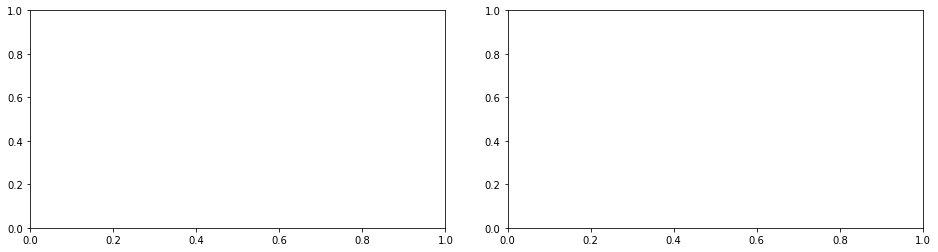

In [407]:
titles = ('Hit_Rate', 'False_Alarm')

for HOUR in range(24):
    all_data = get_data_by_hour(HOUR)
    print('Hour:', HOUR)
    for MONTH in range(5,11):
        for D in PATHS.keys():
            
            fig, axes = plt.subplots(1, 2, figsize=(16,4))

            for i, (ax, name) in enumerate(zip(axes, titles)):
                plt.sca(ax) 

                # Get the data we want from the big dictionary
                boxes = [all_data[D][MONTH]['F%02d_%s' % (f,name)]*100 for f in range(1,19)]
                num_days = len(boxes[0])
                # Must remove nans before we generate box plots.
                # A nan means there were no GLM flashes for the domain and hour.
                boxes = [i[~np.isnan(i)] for i in boxes] # filter out nan values
                num_not_nan = len(boxes[0])

                # Convert the lists to an array for plotting.
                data = np.array(boxes)

                v = plt.violinplot(boxes, showmedians=True, showmeans=False, widths=.75);
                v['cbars'].set_linewidth(1);
                v['cbars'].set_alpha(.5);
                plt.title('%s %s' % (D, name.replace('_', ' ')), loc='left', fontsize=12)
                plt.title('%s' % datetime(2018,MONTH,1, HOUR).strftime('%H:%M UTC %b %Y'), loc='right')
                plt.title('Samples=%s/%s' % (num_not_nan, num_days), fontsize=10)
                plt.xlabel('Forecast Lead Time (Hours)')
                plt.ylabel('%s (%%)' % name.replace('_', ' '))
                plt.ylim([0,100])
                plt.yticks(range(0,101,10))
                plt.xticks(range(1,19))
                plt.grid()
                plt.savefig(SAVEDIR+'Hit-False_by_hour/%s/%02d_%s/Hit-False_h%02d' % (D, MONTH,datetime(2018,MONTH,1, HOUR).strftime('%b'), HOUR))
            plt.close()
        print()
        print('Samples: Number of days with GLM lightning in domain divided by number of days in the month.')

# Scatter: Relationship Between Hit Rate and False Alarm Ratio

In [402]:
for HOUR in range(24):
    all_data = get_data_by_hour(HOUR)

    fig, axes = plt.subplots(2, 3, figsize=(16,8))
    axes = axes.flatten()
    for D, ax in zip(PATHS.keys(), axes):
        plt.sca(ax)
        for MONTH in range(5,11):
            falseDATE = datetime(2018, MONTH, 1, HOUR)
            mean_hit = 100*np.array([np.nanmean(all_data[D][MONTH]['F%02d_Hit_Rate' % i]) for i in range(1,19)])
            mean_false = 100*np.array([np.nanmean(all_data[D][MONTH]['F%02d_False_Alarm' % i]) for i in range(1,19)])

            plt.scatter(mean_hit, mean_false, s=np.arange(19,1,-1)*2, label=falseDATE.strftime('%b'))

        plt.title('%s' % (D), loc='left')
        plt.title('%s' % (falseDATE.strftime('%H:%M UTC %b %Y')), loc='right')
        plt.xlabel('Mean Hit Rate (%)')
        plt.ylabel('Mean False Alarm Rate (%)')
        plt.xlim([0,100])
        plt.ylim([100,0])
        plt.grid()
        plt.legend(loc='lower right')

    # remove last axis
    plt.sca(axes[-1])
    plt.axis('off')
    plt.subplots_adjust(hspace=.4, wspace=.3)

    plt.savefig(SAVEDIR+'Hit-False_Relationship/Hit-False_h%02d' % (HOUR))
    plt.close()
print('Size of point corresponds to Forecast Lead time')
print(' Largest Dot == F01 (shortest lead time)')
print('Smallest Dot == F18 (fading)\n')

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Size of point corresponds to Forecast Lead time
 Largest Dot == F01 (shortest lead time)
Smallest Dot == F18 (fading)



# Number of GLM Flashes by Month

In [399]:
for HOUR in range(24):
    all_data = get_data_by_hour(HOUR)

    for n, D in enumerate(PATHS.keys()):
        fig, axes = plt.subplots(1, 2, figsize=(14,4))

        if D == 'HRRR':
            ylim1 = 6
            ylim2 = 10
        elif D == 'Utah':
            ylim1 = 8
            ylim2 = 40
        else:
            ylim1 = 15
            ylim2 = 15
        
        # Flashes per 1000 km2
        plt.sca(axes[0])
        counts = [all_data[D][MONTH]['GLM_FLASH_COUNT'] for MONTH in all_data[D].keys()]
        num_days = len(counts[0])
        counts = [i[~np.isnan(i)] for i in counts] # filter out nan values again
        num_not_nan = len(counts[0])
        counts = np.array(counts)/area_sqkm[D]*1000 # flashes per 1000 km2

        plt.title('%s Flashes per 1000 km2' % (D), loc='left', fontsize=12)
        plt.title('%s' % datetime(2018,MONTH,1, HOUR).strftime('%H:%M UTC'), loc='right')
        plt.title('Samples=%s/%s\n' % (num_not_nan, num_days), fontsize=10)
        plt.ylabel('Flashes per 1000 km2')
        v = plt.violinplot(counts, showmedians=True, widths=.75);
        v['cbars'].set_linewidth(.8);
        v['cbars'].set_alpha(.8);
        plt.xticks(range(1,2+len(PATHS.keys())), [datetime(2018, m, 1).strftime('%b') for m in all_data[D].keys()]);
        plt.ylim([0, ylim1])
        plt.grid()

        # Percentage of area with LTNG forecasted
        plt.sca(axes[1])
        areas = [all_data[D][MONTH]['F%02d_Total_Area_km2' % fxx] for MONTH in all_data[D].keys()]
        num_days = len(areas[0])
        areas = [i[~np.isnan(i)] for i in areas] # filter out nan values
        num_not_nan = len(areas[0])
        areas = np.array(areas)/area_sqkm[D]*100 # Percentage

        plt.title('%s Percent Area LTNG' % (D), loc='left', fontsize=12)
        plt.title('%s' % datetime(2018,MONTH,1, HOUR).strftime('%H:%M UTC'), loc='right')
        plt.title('Samples=%s/%s\n' % (num_not_nan, num_days), fontsize=10)
        plt.ylabel('Percentage of area with LTNG (%)')
        v = plt.violinplot(areas, showmedians=True, widths=.75);
        v['cbars'].set_linewidth(.8);
        v['cbars'].set_alpha(.8);
        plt.xticks(range(1,2+len(PATHS.keys())), [datetime(2018, m, 1).strftime('%b') for m in all_data[D].keys()]);
        plt.ylim([0, ylim2])
        plt.grid()

        plt.savefig(SAVEDIR+'Flash-Num_and_LTNG-Area/%s/%s_h%02d' % (D, D, HOUR))
        
        plt.close()

# Percentage of expected GLM files availalbe

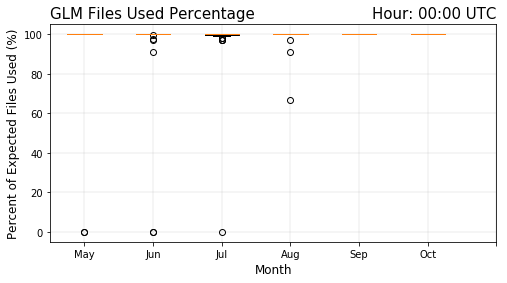

In [386]:
DOMAIN = 'HRRR'
files_present = np.array([all_data[DOMAIN][MONTH]['NUM_FILES'] for MONTH in all_data[DOMAIN].keys()])
files_expected = np.array([all_data[DOMAIN][MONTH]['EXPECTED_FILES'] for MONTH in all_data[DOMAIN].keys()])
files_percentage = [p/files_expected[i]*100 for i,p in enumerate(files_present)]

plt.figure(1, figsize=[8,4])
plt.title("GLM Files Used Percentage", loc='left')
plt.title('Hour: %02d:00 UTC' % hour, loc='right')
plt.ylabel('Percent of Expected Files Used (%)')
plt.boxplot(files_percentage);
plt.xticks(range(1,2+len(all_data[DOMAIN].keys())), [datetime(2019, m, 1).strftime('%b') for m in all_data[DOMAIN].keys()]);
plt.xlabel('Month')
plt.grid()

In [387]:
total_expected = sum([sum(i) for i in files_expected]) # expect 180 files per hour
total_present = sum([sum(i) for i in files_present])
missing_hours = (total_expected-total_present)/180
print('Missing hours of GLM data: %.2f' % missing_hours)

Missing hours of GLM data: 5.74


---
---

# Number of flashes By Hour of Day

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


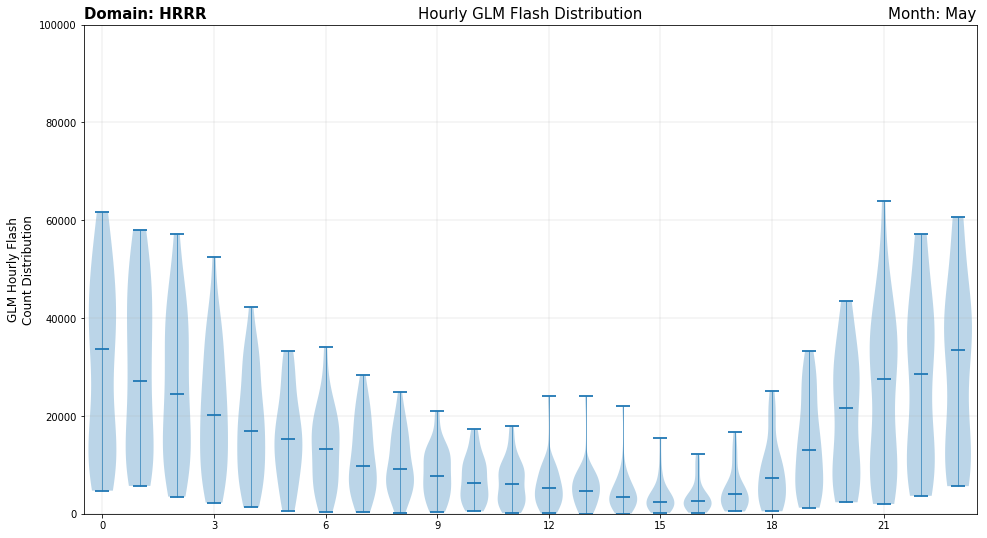

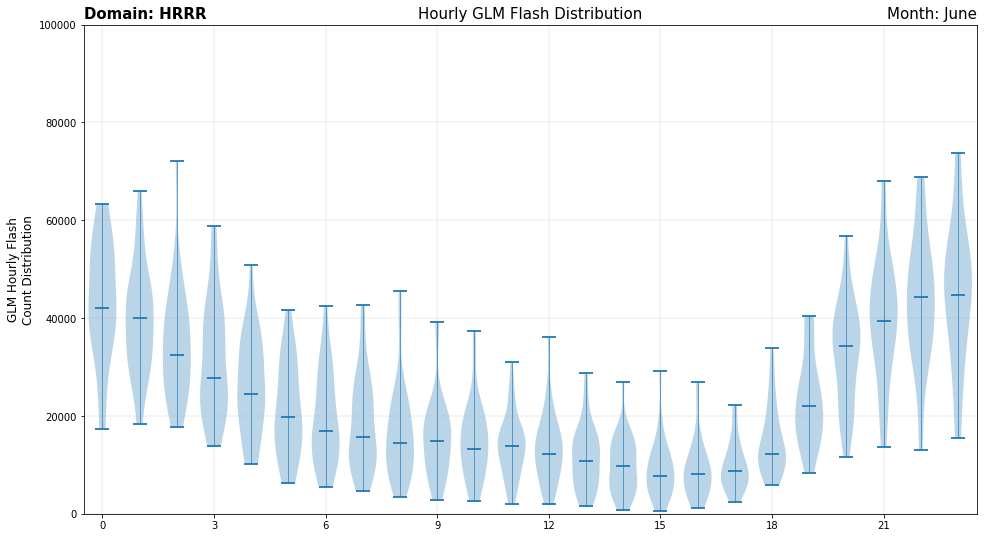

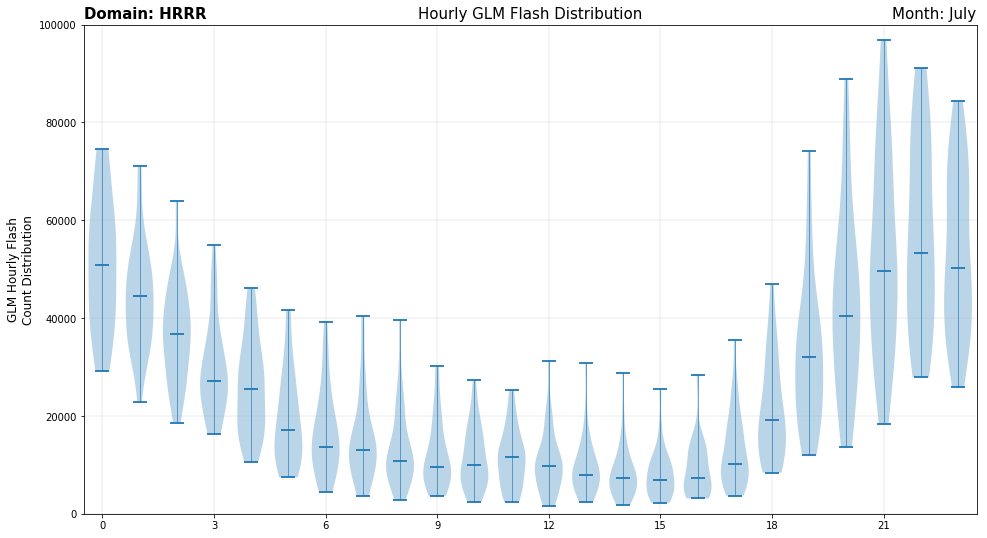

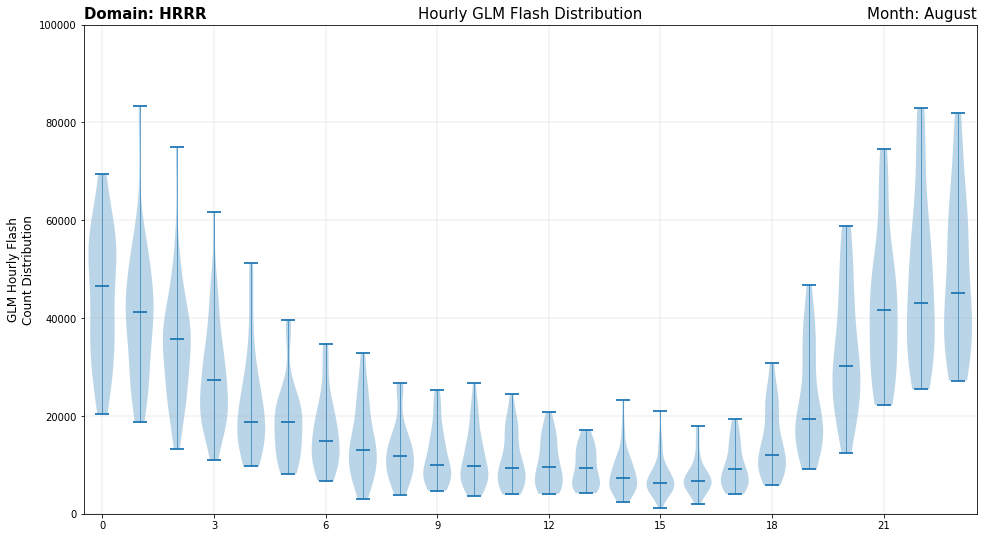

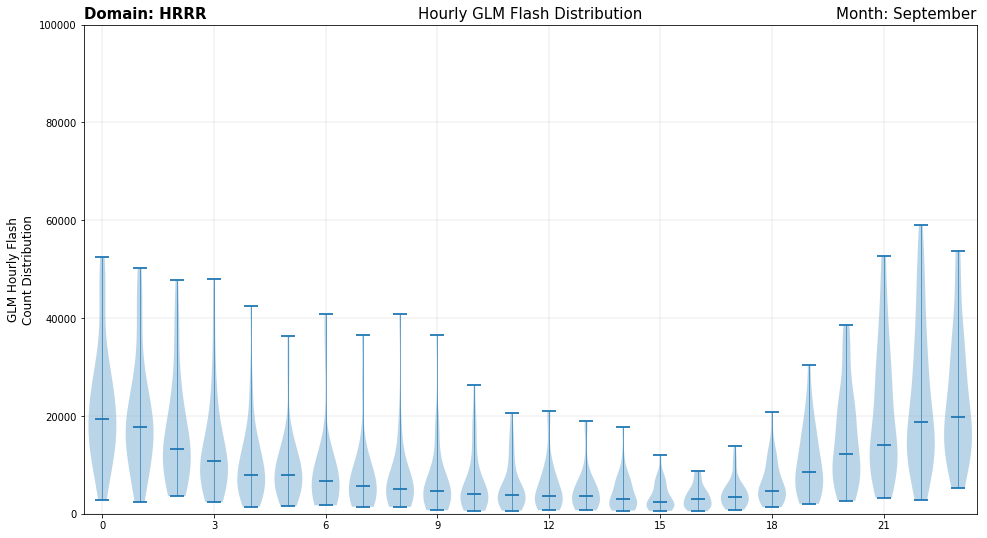

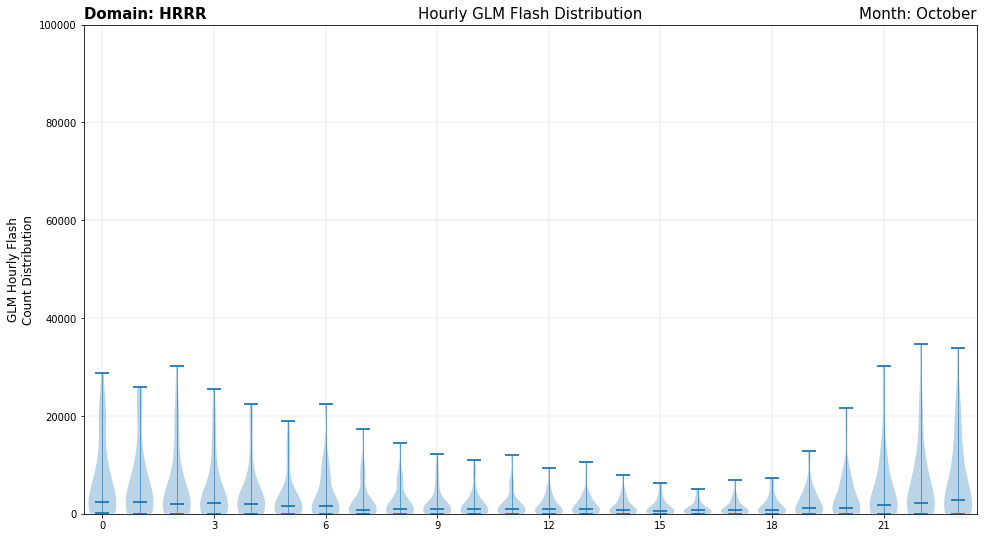

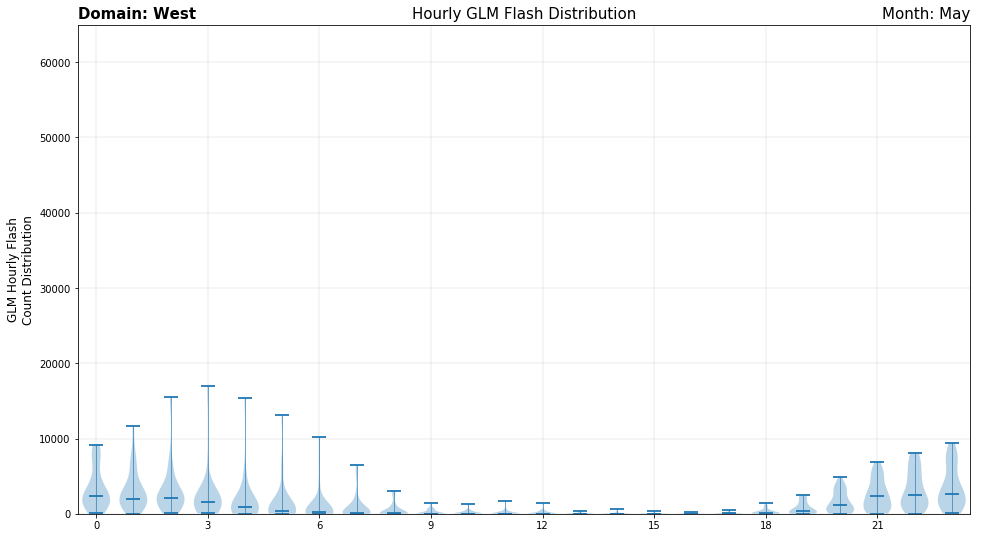

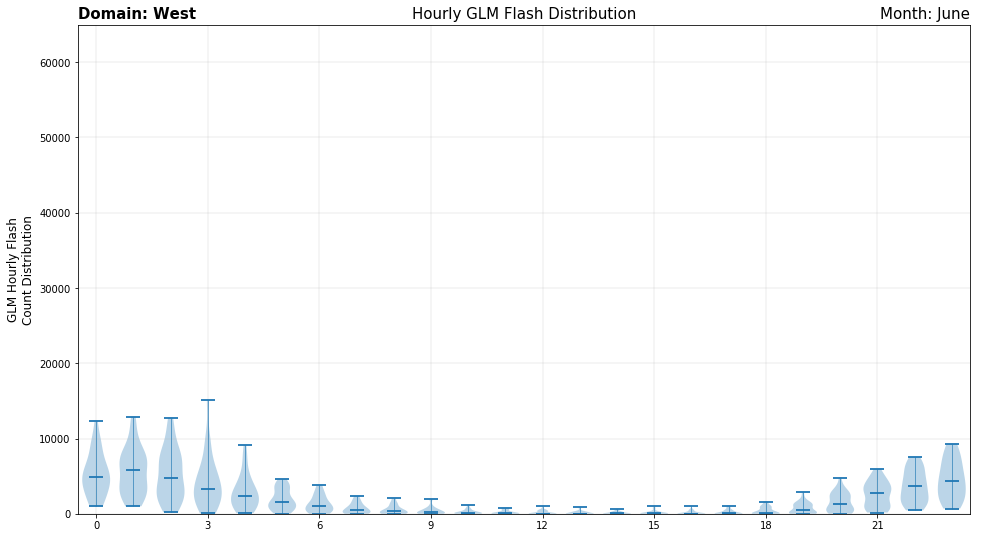

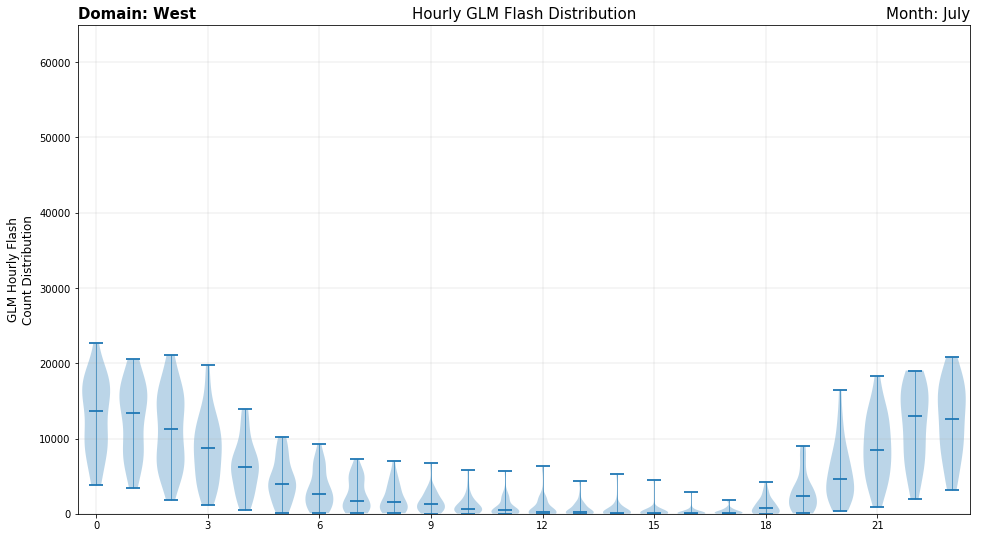

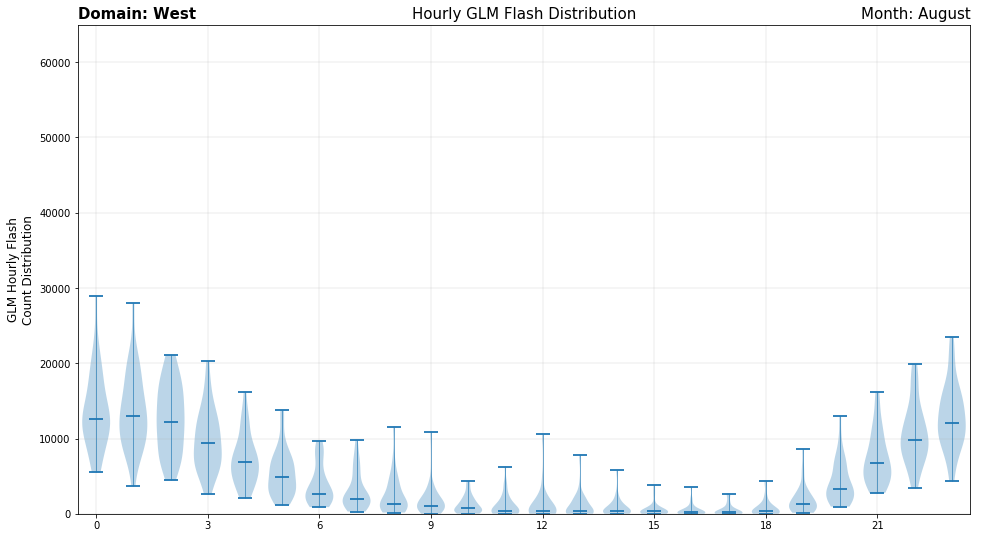

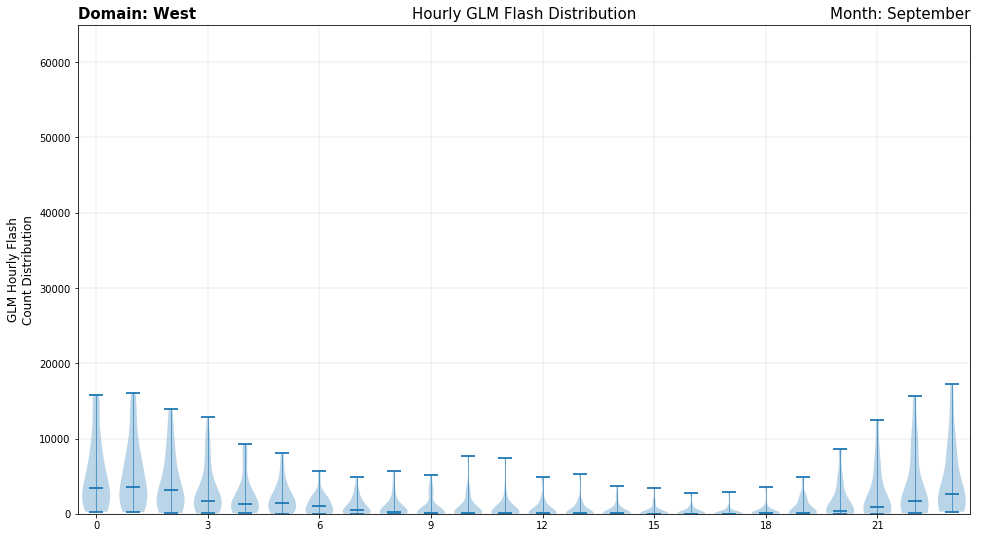

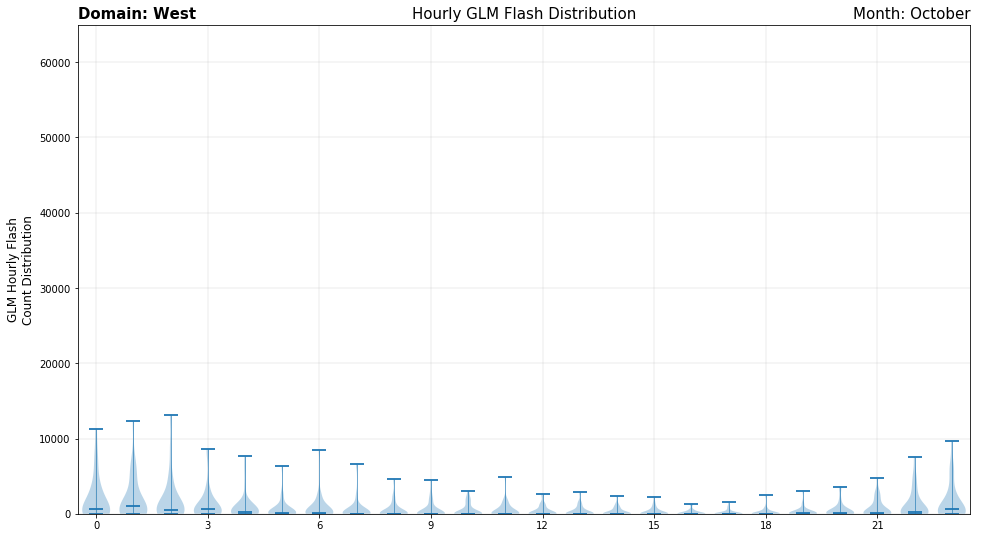

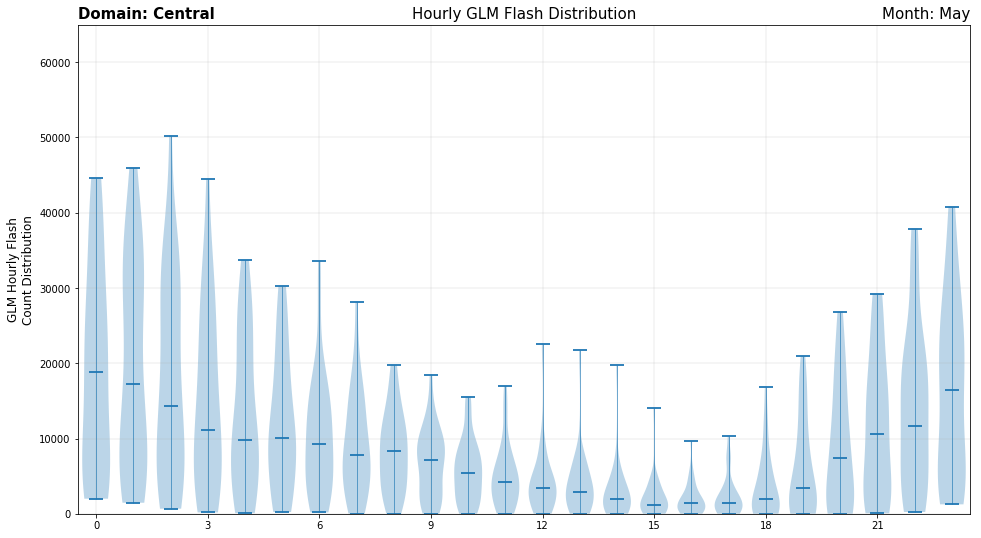

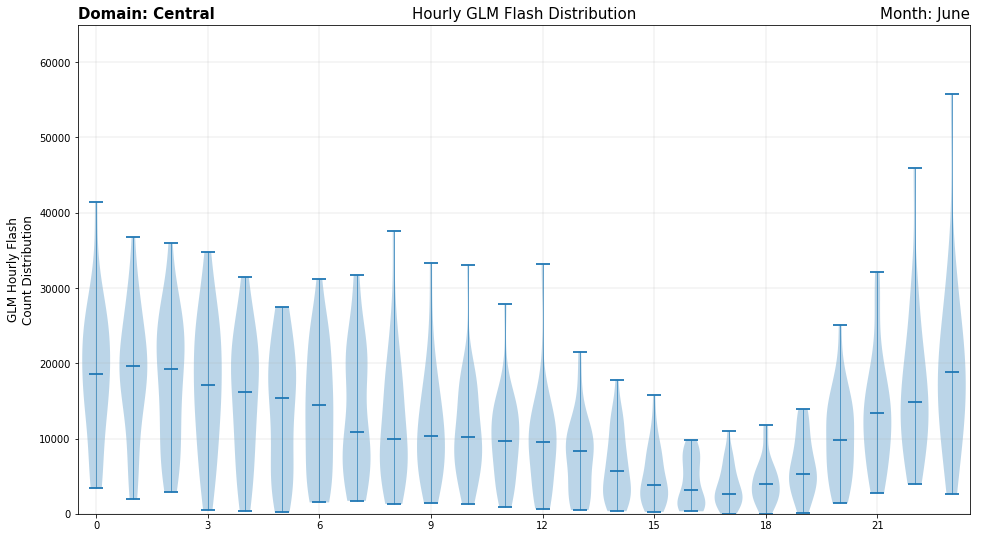

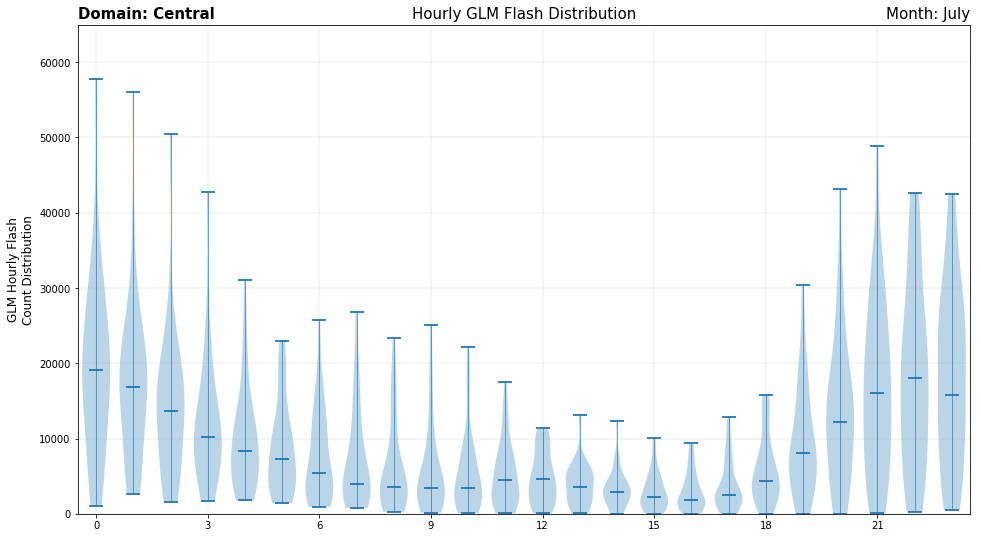

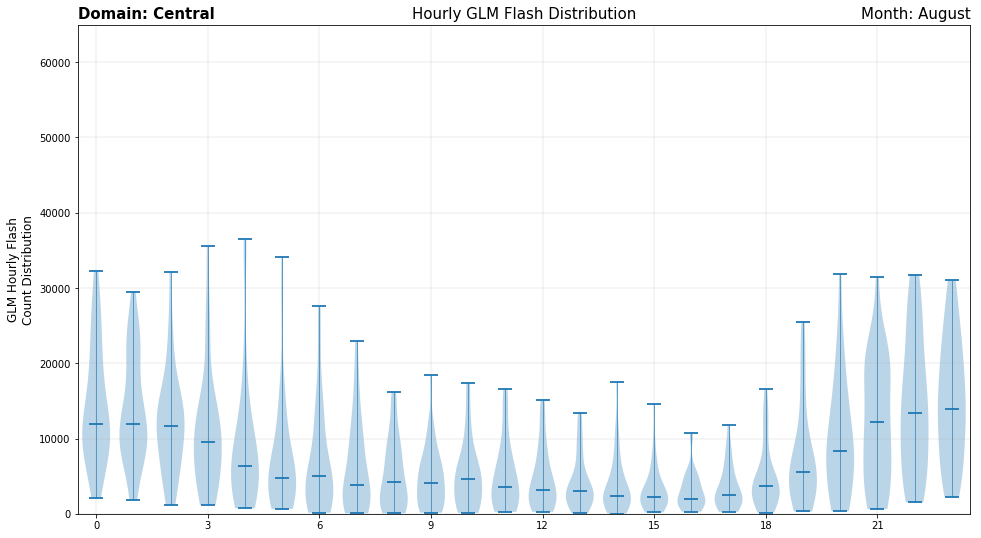

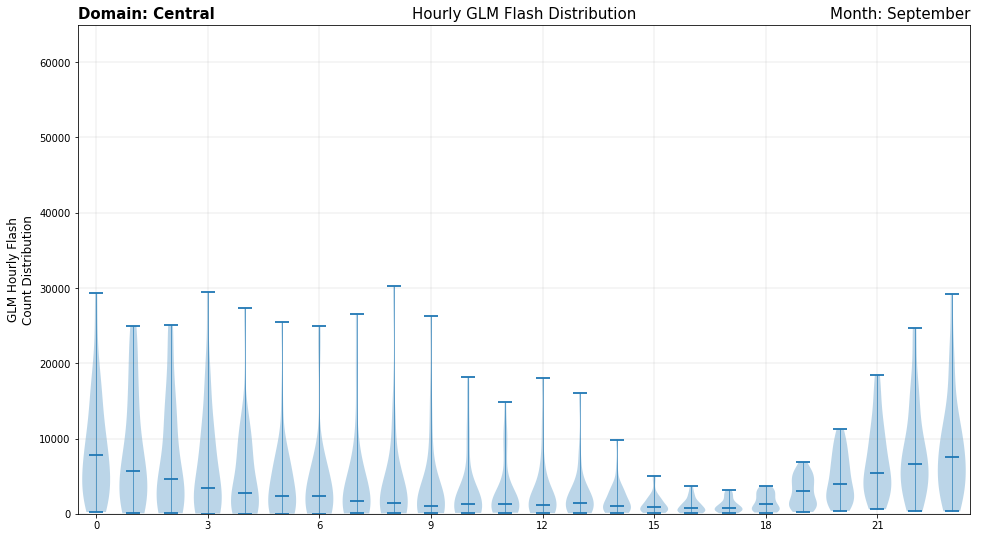

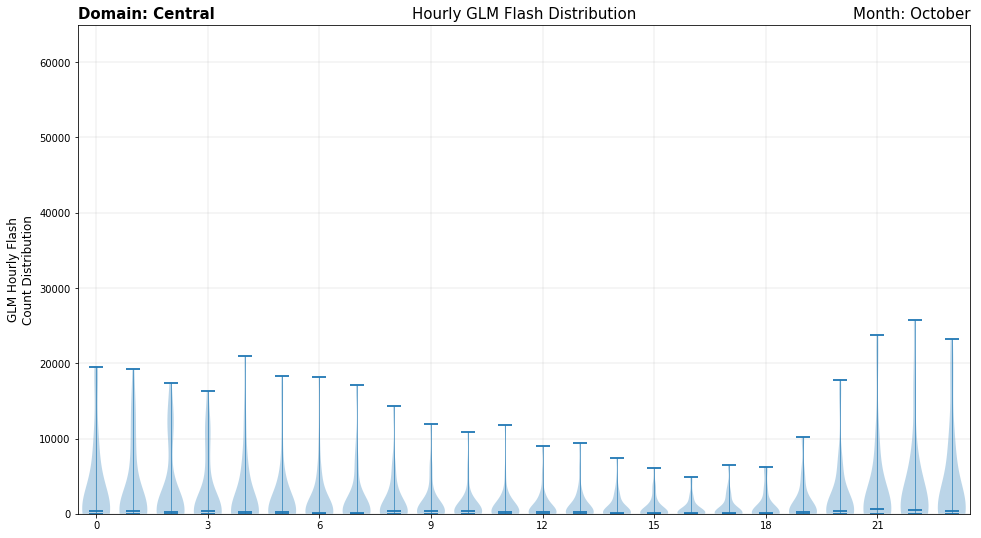

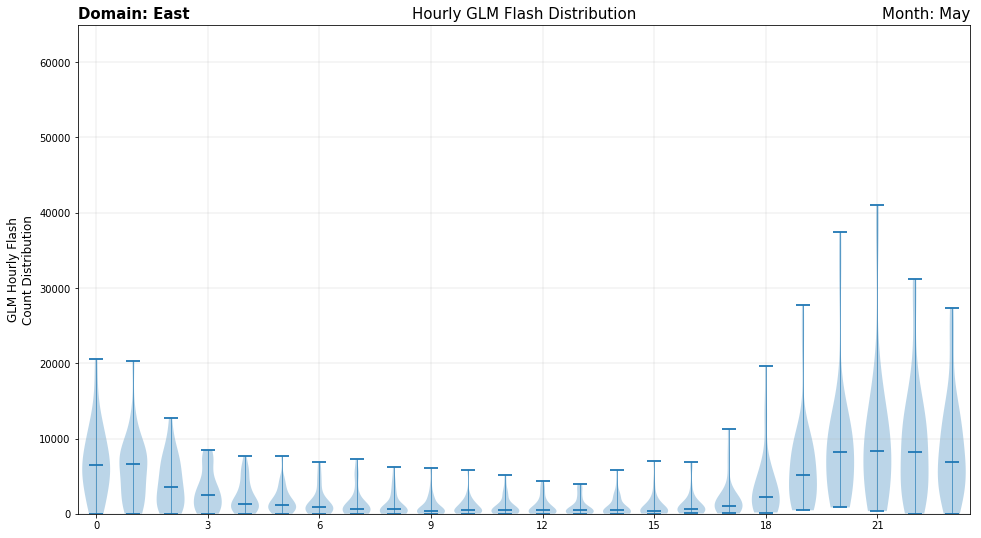

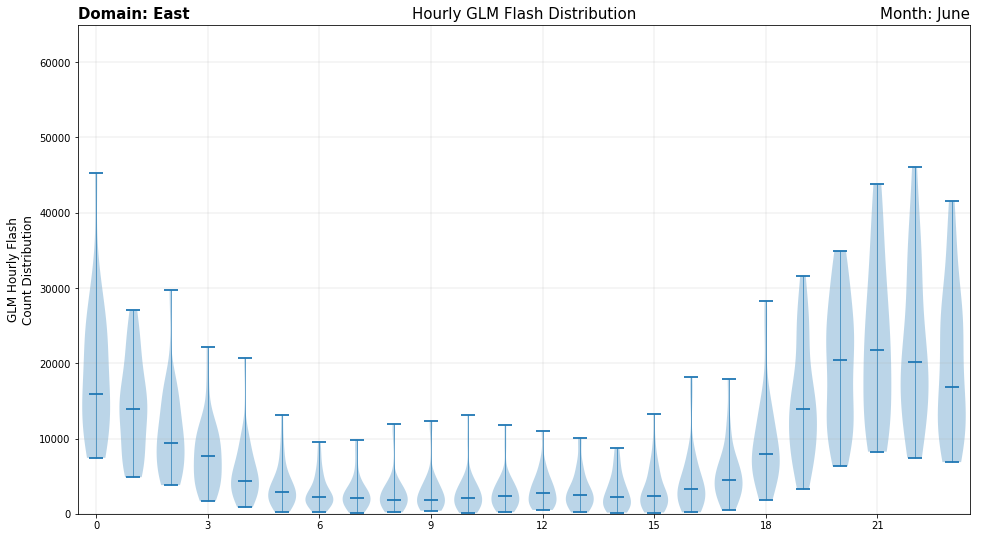

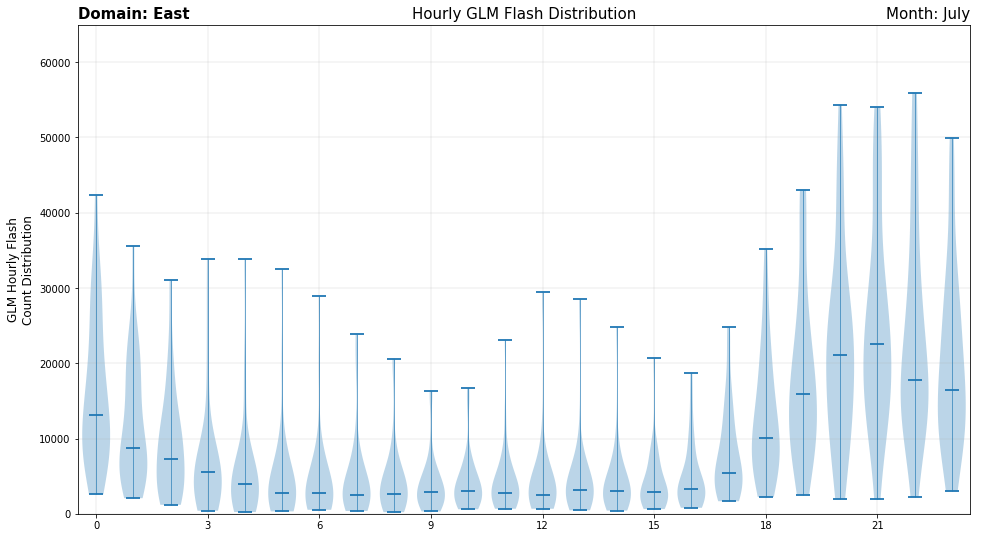

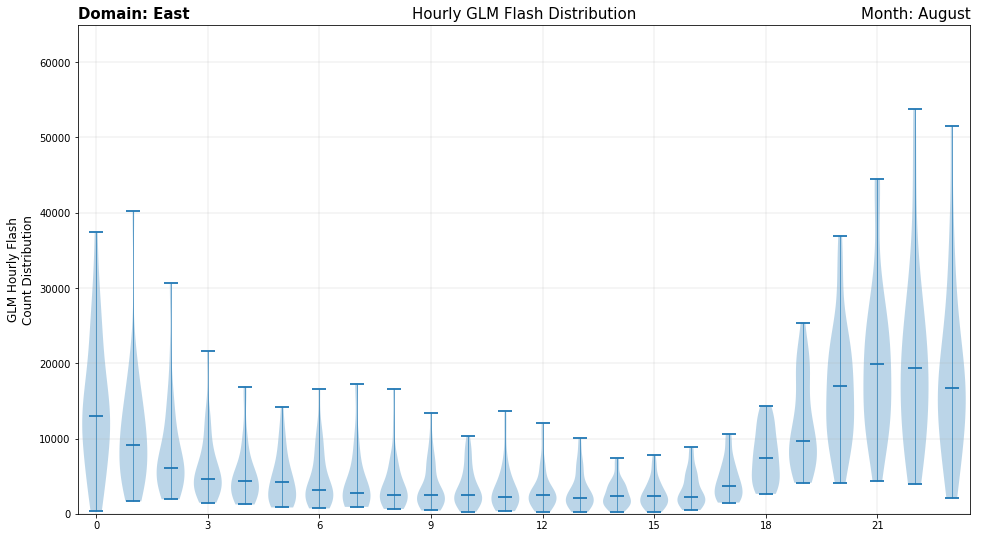

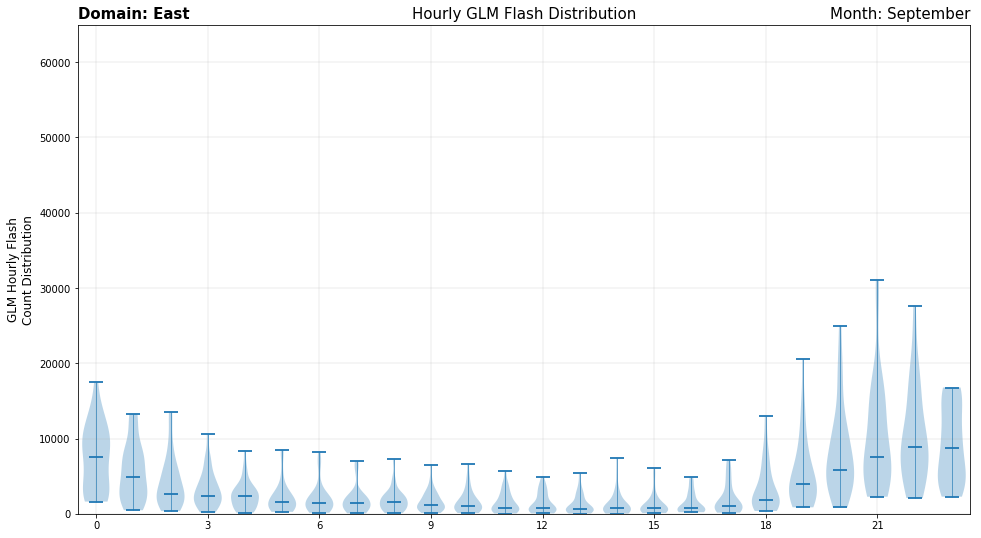

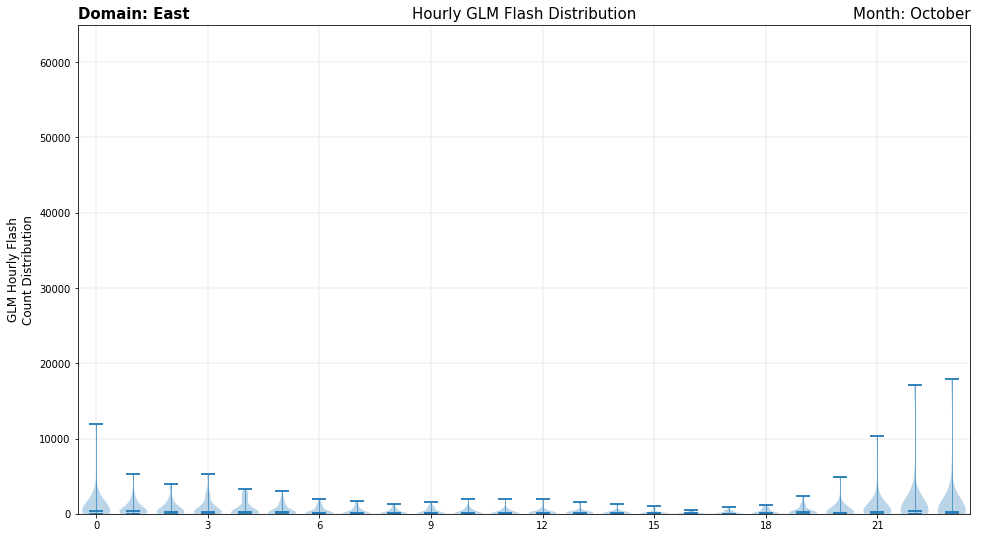

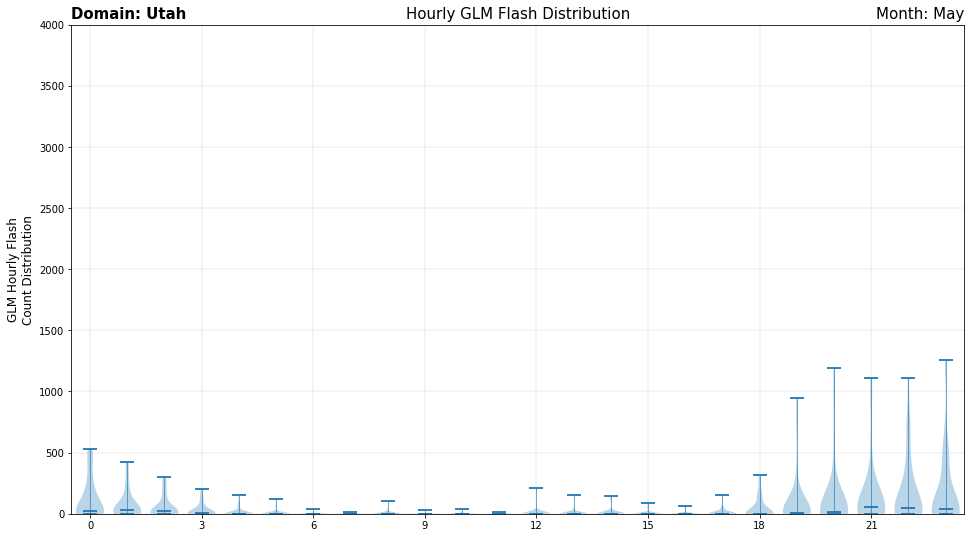

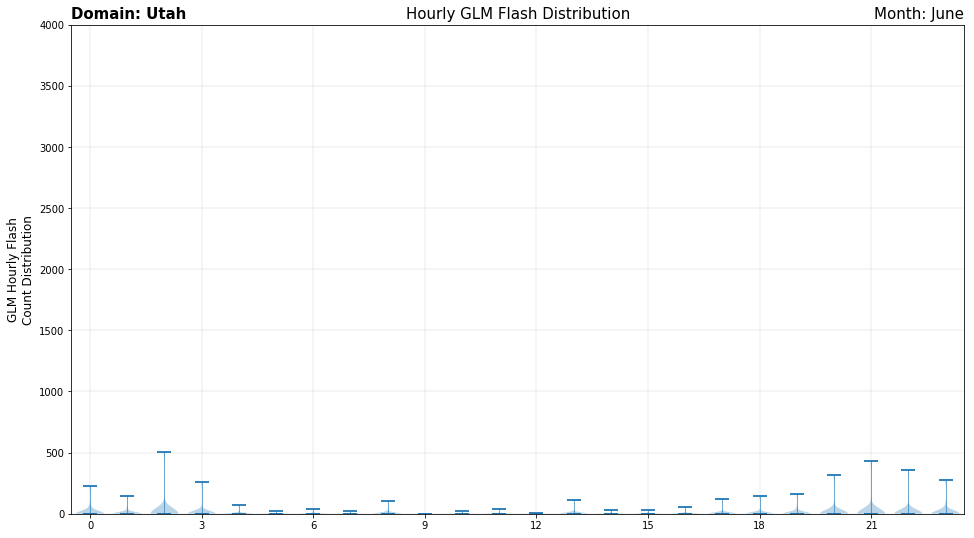

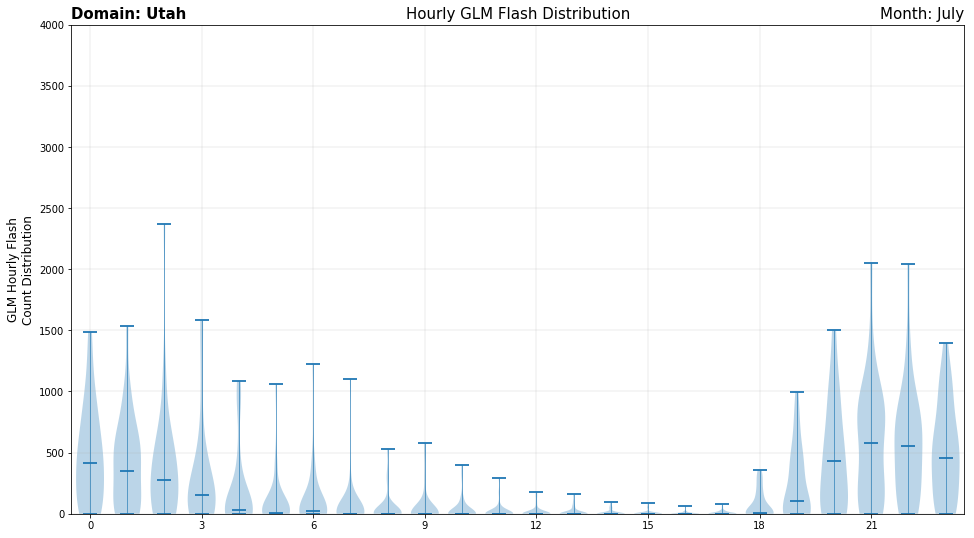

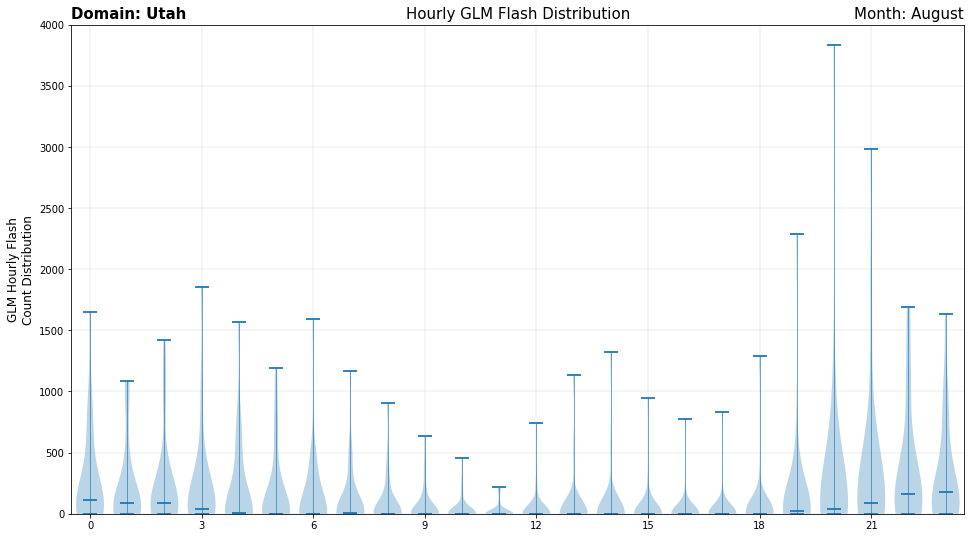

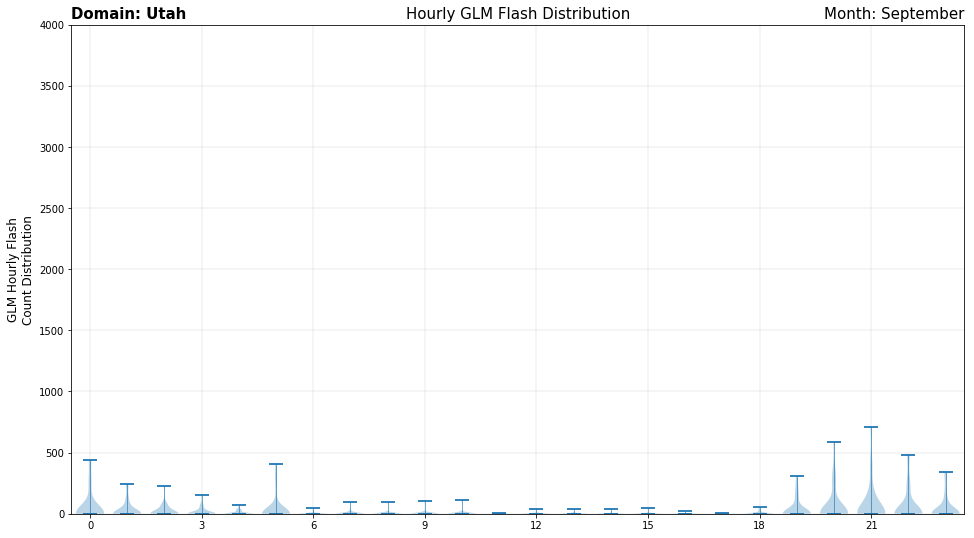

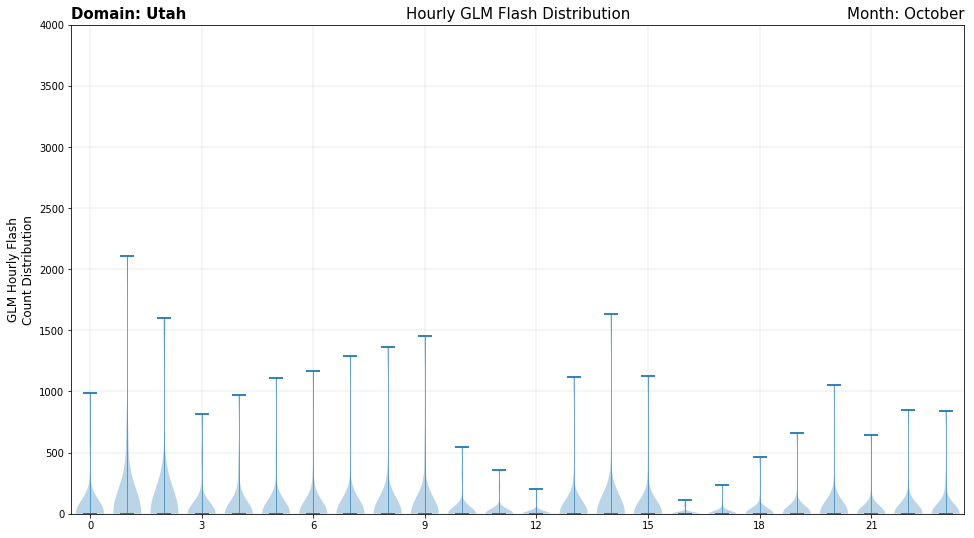

In [195]:
MONTH = 5
DOMAIN = 'HRRR'

plt_count = 1
for m, DOMAIN in enumerate(data_dict.keys()):
    for n, MONTH in enumerate(range(5,11)):
        flashes_hours = []
        for h in range(24):
            DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/HRRR_GLM_hit_rate_data/'
            FILE = 'GLM_in_HRRR_%s_2018_m%02d_h%02d.csv' % (DOMAIN, MONTH, h)
            if os.path.exists(DIR+FILE):
                data = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')
                flashes_hours.append(data['GLM_FLASH_COUNT'])

        flashes_hours = [i[~np.isnan(i)] for i in flashes_hours] # filter out nan values

        plt.figure(plt_count, figsize=[16,9])

        v = plt.violinplot(flashes_hours, range(24), showmedians=True, widths=.75);
        v['cbars'].set_linewidth(.8);
        v['cbars'].set_alpha(.8);

        plt.xticks(range(0,24,3));
        if DOMAIN == 'HRRR':
            plt.ylim([0, 100000])
        elif DOMAIN == 'Utah':
            plt.ylim([0, 4000])
        else:
            plt.ylim([0, 65000])
            
        plt.xlim([-.5,23.5])
        plt.title("Domain: %s" % DOMAIN, loc='left', fontweight='semibold')
        plt.title("Hourly GLM Flash Distribution")
        plt.title('Month: %s' % datetime(2018,MONTH,1).strftime('%B'), loc='right')
        plt.ylabel('GLM Hourly Flash\nCount Distribution')
        plt.grid()

        #plt.savefig(SAVEDIR+'GLM_Flash_Count_Distribtuion_%s_m%s' % (DOMAIN, MONTH))
        plt_count +=1
    